# **BIG DATA TALENTUM**


---


Demostración de Modelo de Aprendizaje Supervisado con Redes Neuronales Convolucionales para Clasificación de Imágenes

Dentro del proceso por el cual pasan los datos hasta poder ser explotados, nos ubicaremos en el paso del procesamiento.

![BigData Process](https://firebasestorage.googleapis.com/v0/b/piskuapp.appspot.com/o/procesoBD.PNG?alt=media&token=48788fcf-0e26-4da4-90b6-9693cdc85ae0)

Los datos que hemos recolectado y almacenado pueden ser procesados, analizados y etiquetados mediante el uso de modelos de Inteligencia Artificial. Una aplicación interesante del modelamiento es la **creación de metadata o etiquetas** que luego faciliten la explotación mediante cuadros de mando.

En este ejemplo vamos a enseñarle a un modelo a **clasificar** en una serie de etiquetas de manera automática las imágenes que va recibiendo. Ya que se basa en **ejemplos**, este tipo de aprendizaje es **supervisado**. Como arquitectura de red neuronal usaremos una red **convolucional 2D**.

In [1]:
# Empezaremos importando las librerías que necesitamos para crear la red
# Para este ejemplo práctico estamos usando Tensorflow, pero hay otra librerías
# que también pueden usarse como PyTorch
from tensorflow.keras import models
from tensorflow.keras import layers

## 1. Entendiendo una Red Convolucional (CNN)

No es objeto de este ejercicio que entendáis a profundidad qué ocurre dentro de una red neuronal, pero sí es relevante que tengáis la intuición de que es lo que permite que funcionen estas redes.

Lo primero es entender que una imagen puede ser representada de varias formas, quizás la más sencilla es como **una matriz de números**. En cada elemento de la matriz tenemos un número que representa el nivel de presencia del color en ese pixel. Ahora bien, podemos decir que una imagen tiene 3 colores primarios (la famosa representación del RGB que encontramos por allí). Una imagen de color podría bien **representarse como 3 matrices, una representando cada color**. Cada pixel tomará un valor de **0 a 255**, de menos a más presente.

<center>

![Image Representation](https://firebasestorage.googleapis.com/v0/b/piskuapp.appspot.com/o/ImageRepresentation.png?alt=media&token=30abc327-3349-4ef5-b979-d07e122d709d)

</center>

En una CNN iremos incorporando capas o layers Conv2D (lo puedes imaginar como un filtro de tamaño x*y) que va recorriendo la imagen completa y obteniendo capas de activación cada vez más pequeñas. Esto en la real sería el simil de buscar patrones o **"atributos"** conocidos que sean capaces de **"resumir la imagen"**.

<center>
<img src="https://firebasestorage.googleapis.com/v0/b/piskuapp.appspot.com/o/RedCNN.png?alt=media&token=14100bd8-6e58-492c-8f15-d269421e753f" alt="drawing" width="500"/>
</center>

Este tipo de redes son muy efectivas para tareas de visión artificial, como en la clasificación y segmentación de imágenes, entre otras aplicaciones.

In [2]:
# Veamos un ejemplo sencillo de red CNN
# en este ejemplo las imágenes de entrada son de 32x32 pixeles en color

convnet= models.Sequential()
# inicio de base model o feature extractor
convnet.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
convnet.add(layers.Conv2D(32,(3,3),activation='relu'))
convnet.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet.add(layers.Conv2D(64,(3,3),activation='relu'))
# fin de base model o feature extractor
# se estira y se ingresa a un perceptron multicapa normal
convnet.add(layers.Flatten())
convnet.add(layers.Dense(512, activation="relu"))
convnet.add(layers.Dense(10, activation="softmax"))

convnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 512)               18874880  
                                                                 
 dense_1 (Dense)             (None, 10)                5

## 2. Carga de Datos

In [3]:
# Ya que vamos a trabajar con muchas imágenes, vamos a montar una unidad de almacenamiento
# en el caso de Colab, podemos usar nuestra unidad de Drive como almacenamiento
from google.colab import drive
drive.mount('/content/drive')

# Puedes reemplazar aquí la ubicación que quieras utilizar
BASE_FOLDER = '/content/drive/My Drive/Meetups-Charlas-Actividades/BigDataTalentum'

Mounted at /content/drive


### Cargando el conjunto conjunto de datos y acondicionandolo

In [4]:
# Importando el set de datos de CIFAR10
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer
print('[INFO]: Loading CIFAR-10 data...')
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float")/255.0
textX = testX.astype("float")/255.0
labelNames = ["Avion", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]
print(trainX.shape)
print(trainY.shape)
# Por si es necesario convertir a one-hot encoding
# lb = LabelBinarizer()
# trainY = lb.fit_transform(trainY)
# testY = lb.fit_transform(testY)

[INFO]: Loading CIFAR-10 data...
170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(50000, 1)


In [5]:
print(testX.shape)
print(testY.shape)

(10000, 32, 32, 3)
(10000, 1)


### Inspeccionando el conjunto de datos

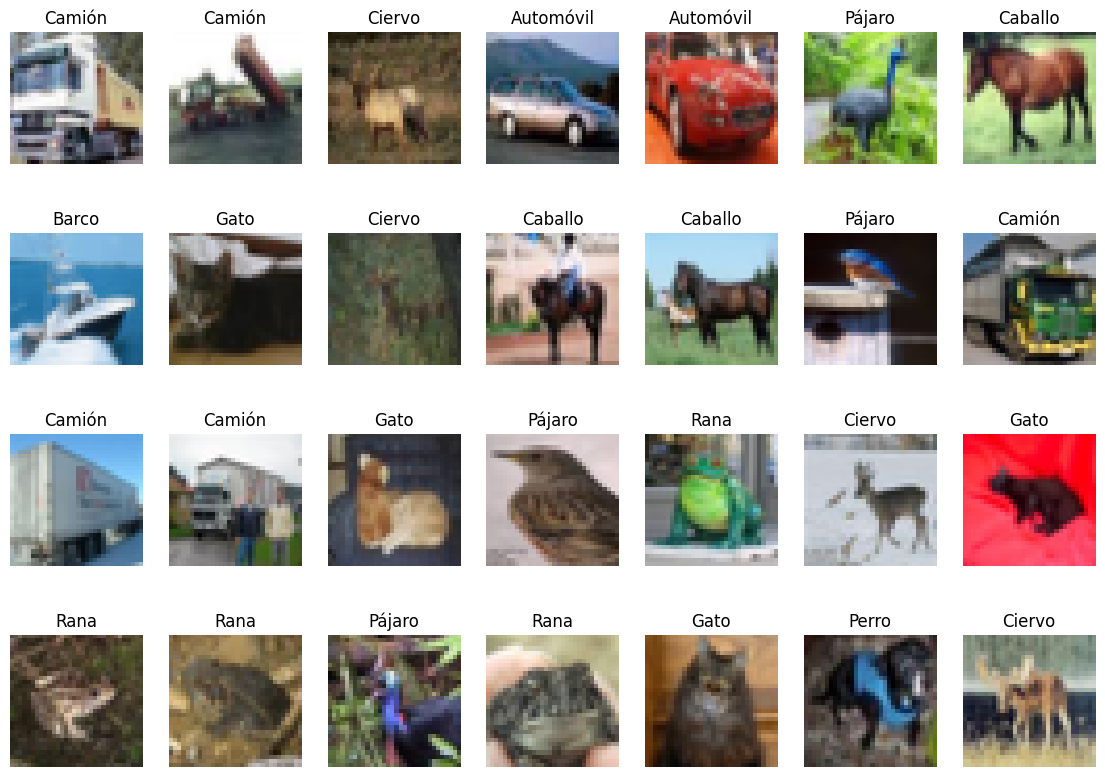

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,10))
for n in range(1,29):
  fig.add_subplot(4,7,n)
  img = trainX[n]
  plt.imshow(img)
  plt.title(labelNames[trainY[n][0]])
  plt.axis('off')

## 3. Creando la topología de la red neuronal (MLP)

### Perceptrón Multicapa Tradicional (MLP)

[INFO]: Entrenando el modelo...
Epoch 1/50
1250/1250 [==============================] - 10s 5ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1014
Epoch 2/50
1250/1250 [==============================] - 6s 5ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1014
Epoch 3/50
1250/1250 [==============================] - 6s 5ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1014
Epoch 4/50
1250/1250 [==============================] - 6s 5ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1014
Epoch 5/50
1250/1250 [==============================] - 6s 5ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1014
Epoch 6/50
1250/1250 [==============================] - 6s 5ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1014
Epoch 7/50
1250/1250 [==============================] - 7s 5ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1014
E

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


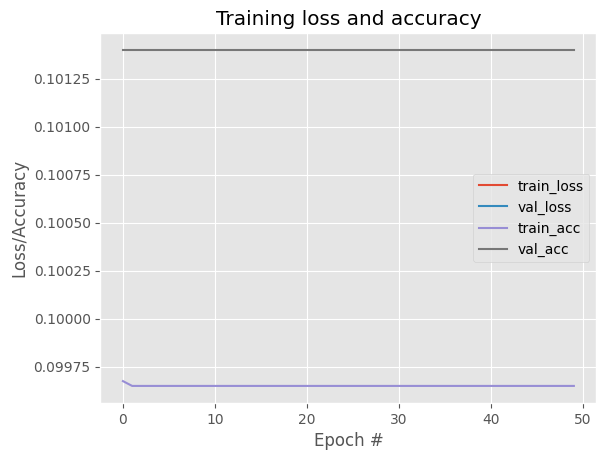

In [7]:
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Arquitectura de red
model = Sequential()
model.add(Flatten())
model.add(Dense(2048, input_shape=(32*32*3,), activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

# Compilamos el modelo
print('[INFO]: Entrenando el modelo...')
model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(0.01), metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_split=0.2, epochs=50, batch_size=32)

# Evaluamos las muestras del test
print('[INFO]: Evaluando el modelo...')
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY, predictions.argmax(axis=1), target_names=labelNames))

# Mostramos accuracy y loss
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0,50), H.history['loss'], label='train_loss')
plt.plot(np.arange(0,50), H.history['val_loss'], label='val_loss')
plt.plot(np.arange(0,50), H.history['accuracy'], label='train_acc')
plt.plot(np.arange(0,50), H.history['val_accuracy'], label='val_acc')
plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

### Red Convolucional (CNN)

[INFO]: Compilando el modelo...
[INFO]: Entrenamos el modelo...
Epoch 1/15
313/313 [==============================] - 28s 33ms/step - loss: 1.6564 - accuracy: 0.4545 - val_loss: 2.3718 - val_accuracy: 0.2714
Epoch 2/15
313/313 [==============================] - 9s 27ms/step - loss: 1.0559 - accuracy: 0.6279 - val_loss: 1.0326 - val_accuracy: 0.6392
Epoch 3/15
313/313 [==============================] - 9s 28ms/step - loss: 0.8386 - accuracy: 0.7063 - val_loss: 1.0771 - val_accuracy: 0.6648
Epoch 4/15
313/313 [==============================] - 8s 27ms/step - loss: 0.7226 - accuracy: 0.7456 - val_loss: 0.8088 - val_accuracy: 0.7286
Epoch 5/15
313/313 [==============================] - 8s 27ms/step - loss: 0.6510 - accuracy: 0.7705 - val_loss: 0.6930 - val_accuracy: 0.7623
Epoch 6/15
313/313 [==============================] - 9s 27ms/step - loss: 0.5807 - accuracy: 0.7982 - val_loss: 0.7586 - val_accuracy: 0.7470
Epoch 7/15
313/313 [==============================] - 8s 26ms/step - loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

       Avion       0.53      0.09      0.15      1000
   Automóvil       0.19      0.92      0.31      1000
      Pájaro       0.42      0.25      0.32      1000
        Gato       0.47      0.01      0.02      1000
      Ciervo       0.60      0.00      0.01      1000
       Perro       0.39      0.34      0.36      1000
        Rana       0.00      0.00      0.00      1000
     Caballo       0.31      0.62      0.41      1000
       Barco       0.53      0.27      0.36      1000
      Camión       0.35      0.34      0.34      1000

    accuracy                           0.28     10000
   macro avg       0.38      0.28      0.23     10000
weighted avg       0.38      0.28      0.23     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


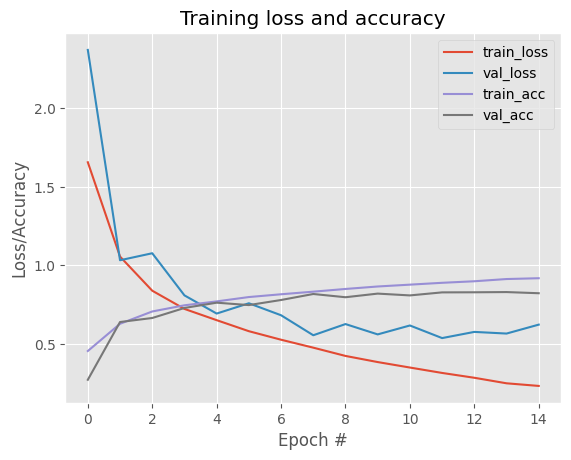

In [8]:
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report as cr
import matplotlib.pyplot as plt
from google.colab import drive

# Definimos la arquitectura

##BASE MODEL
inputs = Input(shape=(trainX.shape[1],trainX.shape[2], trainX.shape[3]))

# PRIMER SET DE CAPAS CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3,3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(32, (3,3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2,2))(x1)
x1 = Dropout(0.25)(x1)

# SEGUNDO SET DE CAPAS CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3,3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3,3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2,2))(x2)
x2 = Dropout(0.25)(x2)

# TERCER SET DE CAPAS CONV => RELU => CONV => RELU => POOL
x3 = Conv2D(256, (3,3), padding="same", activation="relu")(x2)
x3 = BatchNormalization()(x3)
x3 = Conv2D(256, (3,3), padding="same", activation="relu")(x3)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2,2))(x3)
x3 = Dropout(0.25)(x3)

# TOP MODEL
xfc = Flatten()(x3)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)
predictions = Dense(10, activation = "softmax")(xfc)

model_cnn=Model(inputs=inputs, outputs=predictions)

# compilar el modelo
print("[INFO]: Compilando el modelo...")
model_cnn.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.001, epsilon=1e-08), metrics=["accuracy"])

# entrenamos el modelo
print("[INFO]: Entrenamos el modelo...")
H = model_cnn.fit(trainX, trainY,validation_split=0.2, batch_size=128, epochs=15, verbose=1)

# almaceno el modelo en Drive
model_cnn.save(BASE_FOLDER+"deepCNN_CIFAR10.h5")

# Evaluamos las muestras del test
print('[INFO]: Evaluando el modelo...')
predictions = model_cnn.predict(testX, batch_size=32)
print(classification_report(testY, predictions.argmax(axis=1), target_names=labelNames))

# Mostramos accuracy y loss
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0,15), H.history['loss'], label='train_loss')
plt.plot(np.arange(0,15), H.history['val_loss'], label='val_loss')
plt.plot(np.arange(0,15), H.history['accuracy'], label='train_acc')
plt.plot(np.arange(0,15), H.history['val_accuracy'], label='val_acc')
plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()


## 4. Ampliando los datos de entrenamiento (Data Augmentation)

### Acondicionando el dataset

In [9]:
from sklearn.preprocessing import LabelBinarizer
# Por si es necesario convertir a one-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
print(trainY.shape)
print(testY.shape)


(50000, 10)
(10000, 10)


### Creando un contenedor DataGenerator para el aumento automático de muestras

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 15, # grados de rotacion aleatoria
    width_shift_range=0.2, # fracción del total (1) para mover la imagen
    height_shift_range=0.2, # fracción del total (1) para mover la imagen
    horizontal_flip=True, # girar las imagenes horizontalmente
    # shear_range=0, #deslizamientos
    zoom_range=0.2, # rango de zoom

)

### Inspeccionando los datos creados sintéticamente

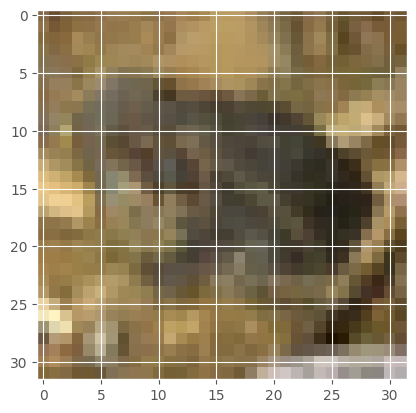

Label = Rana


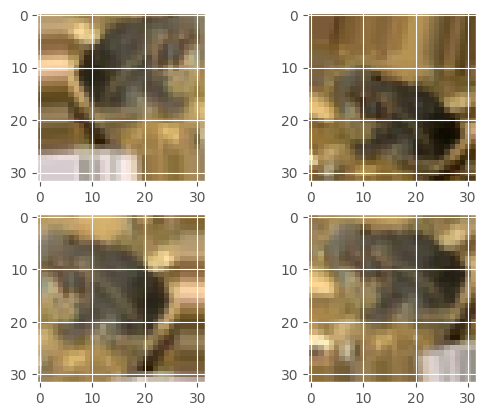

In [11]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

sample = 23
plt.imshow(image.array_to_img(trainX[sample]))
plt.show()
print("Label = {}".format(labelNames[trainY[sample].argmax(axis=0)]))

fig, axes = plt.subplots(2,2)
i = 0
for batch in datagen.flow(trainX[sample].reshape((1,32,32,3)), batch_size=1):
  axes[i//2,i%2].imshow(image.array_to_img(batch[0]))
  i += 1
  if i == 4:
    break
plt.show()

### Creando la topología de red neuronal CNN y entrenandola

[INFO]: Compilando el modelo...
[INFO]: Entrenamos el modelo...
Epoch 1/50
390/390 [==============================] - 40s 93ms/step - loss: 1.8991 - accuracy: 0.3641 - val_loss: 246.1973 - val_accuracy: 0.1378
Epoch 2/50
390/390 [==============================] - 35s 89ms/step - loss: 1.3839 - accuracy: 0.5054 - val_loss: 310.0942 - val_accuracy: 0.1958
Epoch 3/50
390/390 [==============================] - 36s 91ms/step - loss: 1.1644 - accuracy: 0.5839 - val_loss: 225.0196 - val_accuracy: 0.2229
Epoch 4/50
390/390 [==============================] - 34s 86ms/step - loss: 1.0329 - accuracy: 0.6363 - val_loss: 215.4741 - val_accuracy: 0.2293
Epoch 5/50
390/390 [==============================] - 35s 90ms/step - loss: 0.9486 - accuracy: 0.6658 - val_loss: 162.1219 - val_accuracy: 0.2331
Epoch 6/50
390/390 [==============================] - 34s 87ms/step - loss: 0.8720 - accuracy: 0.6941 - val_loss: 195.1635 - val_accuracy: 0.2485
Epoch 7/50
390/390 [==============================] - 35s 90

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[INFO]: Evaluando el modelo...
79/79 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

       Avion       0.44      0.01      0.02      1000
   Automóvil       0.51      0.64      0.57      1000
      Pájaro       0.19      0.23      0.21      1000
        Gato       0.12      0.06      0.08      1000
      Ciervo       0.57      0.00      0.01      1000
       Perro       0.15      0.95      0.26      1000
        Rana       0.00      0.00      0.00      1000
     Caballo       1.00      0.02      0.05      1000
       Barco       0.93      0.12      0.21      1000
      Camión       0.63      0.39      0.48      1000

    accuracy                           0.24     10000
   macro avg       0.45      0.24      0.19     10000
weighted avg       0.45      0.24      0.19     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


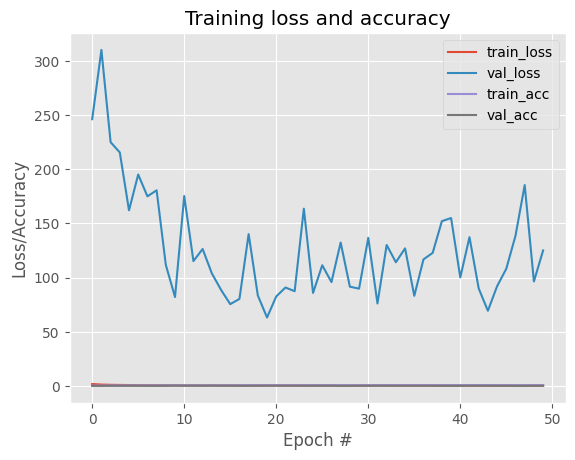

In [12]:
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report as cr
import matplotlib.pyplot as plt
from google.colab import drive

# Definimos la arquitectura

##BASE MODEL
inputs = Input(shape=(trainX.shape[1],trainX.shape[2], trainX.shape[3]))

# PRIMER SET DE CAPAS CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3,3), padding="same", activation="relu")(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv2D(32, (3,3), padding="same", activation="relu")(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2,2))(x1)
x1 = Dropout(0.25)(x1)

# SEGUNDO SET DE CAPAS CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3,3), padding="same", activation="relu")(x1)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3,3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2,2))(x2)
x2 = Dropout(0.25)(x2)

# TERCER SET DE CAPAS CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(256, (3,3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(256, (3,3), padding="same", activation="relu")(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2,2))(x2)
x2 = Dropout(0.25)(x2)

# TOP MODEL
xfc = Flatten()(x2)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)
predictions = Dense(10, activation = "softmax")(xfc)

# Unimos las entradas y el modelo mediante la funcion Model
model_aug=Model(inputs=inputs, outputs=predictions)

# compilar el modelo
print("[INFO]: Compilando el modelo...")
model_aug.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001, epsilon=1e-08), metrics=["accuracy"])

# entrenamos el modelo
print("[INFO]: Entrenamos el modelo...")
H_aug = model_aug.fit(datagen.flow(trainX, trainY, batch_size=128),
                      #steps_per_epoch=len(trainX)*2 /128, epochs=50, validation_data=(testX,testY)) #2 muestras sinteticas
                      steps_per_epoch=len(trainX)//128, epochs=50, validation_data=(testX,testY)) #2 muestras sinteticas

# almaceno el modelo en Drive
drive.mount('/content/drive')
# almacenamos el modelo empleando la funcion model.save de Keras
model_aug.save(BASE_FOLDER+"deepCNN_CIFAR10_aug.h5")

# Evaluamos las muestras del test
print('[INFO]: Evaluando el modelo...')
predictions = model_aug.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

# Mostramos accuracy y loss
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0,50), H_aug.history['loss'], label='train_loss')
plt.plot(np.arange(0,50), H_aug.history['val_loss'], label='val_loss')
plt.plot(np.arange(0,50), H_aug.history['accuracy'], label='train_acc')
plt.plot(np.arange(0,50), H_aug.history['val_accuracy'], label='val_acc')
plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()


## 5. Visualizando algunos resultados

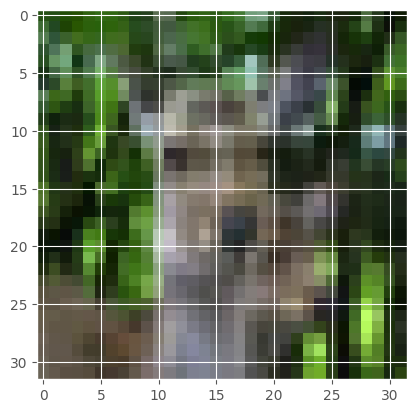

(32, 32, 3)
1/1 [==============================] - 0s 28ms/step
Perro


In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img

# Visualizando la imagen
sample = 405
input_img = testX[sample].reshape((1,32,32,3))
plt.imshow(array_to_img(testX[sample]))
plt.show()

print(trainX[sample].shape)
results = model_aug.predict( np.array( [testX[sample],] )  )
y_classes = results.argmax(axis=-1)
print(labelNames[y_classes[0]])



(32, 32, 3)


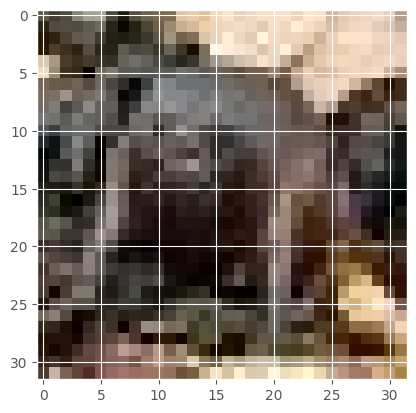

1/1 [==============================] - 0s 18ms/step
Rana


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import array_to_img

img = Image.open('sapo.jpg')
arr = np.array(img)
print(arr.shape)

plt.imshow(array_to_img(arr))
plt.show()

results = model_aug.predict( np.array( [trainX[sample],] )  )
y_classes = results.argmax(axis=-1)
print(labelNames[y_classes[0]])